In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
player_ids = pd.read_csv('files/SFBB Player ID Map - PLAYERIDMAP.csv')
player_ids = player_ids[['MLBNAME', 'MLBID']].copy()
display([(i, player_ids[i].dtype) for i in player_ids.columns])
player_ids = player_ids.dropna(subset=['MLBID']).copy()
player_ids['MLBID'] = player_ids['MLBID'].astype('int64')
display([(i, player_ids[i].dtype) for i in player_ids.columns])
batter_names = player_ids.drop_duplicates(subset='MLBID').set_index('MLBID')['MLBNAME']

[('MLBNAME', dtype('O')), ('MLBID', dtype('float64'))]

[('MLBNAME', dtype('O')), ('MLBID', dtype('int64'))]

In [3]:
savant_2024 = pd.read_csv('files/2024/savantdata-2024.csv')

In [4]:
savant_2024['batter_name'] = savant_2024['batter'].map(batter_names)
print("Missing names:", savant_2024['batter_name'].isna().sum())
print("Total rows:", len(savant_2024))

Missing names: 5057
Total rows: 708825


In [5]:
savant_2024.loc[:, 'pitch_uid'] = (savant_2024['game_pk'].astype(str) + '_' + savant_2024['at_bat_number'].astype(str) + '_' + savant_2024['pitch_number'].astype(str))
savant_2024 = savant_2024.drop_duplicates(subset=['pitch_uid'])

In [6]:
display(savant_2024.shape)
display(savant_2024.head())

(708825, 120)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name,pitch_uid
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,X,6.0,ground_ball,2,2,2024,-0.96,0.99,0.67,3.00,NaN,642201.0,NaN,2,9,Bot,112.78,146.97,NaN,NaN,NaN,NaN,9.893410,-141.548522,-1.857108,-15.148286,30.423852,-18.544662,3.43,1.54,5.0,87.6,-30.0,99.9,2196.0,7.6,747139,682626,624413,657193,578428,596019,607043,621438,516782,52.91,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,5,4-Seam Fastball,7,8,7,8,8,7,7,8,Standard,Strategic,232.0,-0.142,-0.248,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,6.149605,12.090516,22.160400,45.805662,22.048373,Travis d'Arnaud,747139_82_5
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,1,2,2024,0.20,0.61,0.75,1.20,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.952856,-131.970548,-5.159843,1.012613,25.103830,-24.224355,3.47,1.52,NaN,NaN,NaN,92.9,2209.0,7.3,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,201.0,0.000,0.037,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,NaN,NaN,NaN,NaN,NaN,Travis d'Arnaud,747139_82_4
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,S,NaN,NaN,1,1,2024,0.12,0.35,0.66,1.61,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.757602,-132.670539,-3.857177,0.114032,25.108326,-27.443443,3.43,1.54,NaN,NaN,NaN,93.5,2302.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,3,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,210.0,0.000,-0.060,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,23.541699,-27.093819,34.778701,45.227965,45.368412,Travis d'Arnaud,747139_82_3
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,0,1,2024,0.21,0.63,0.61,1.18,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.385514,-132.826939,-5.397765,1.181254,26.329685,-23.817729,3.47,1.54,NaN,NaN,NaN,93.5,2227.0,7.

In [7]:
display(savant_2024.columns[savant_2024.isna().sum() / len(savant_2024) >= 0.9])
old_system_cols = ['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire']

savant_2024 = savant_2024.drop(columns = old_system_cols).copy()
savant_2024 = savant_2024.dropna(axis=0, subset=['pitch_type', 'zone']).copy()

Index(['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'on_3b', 'tfs_deprecated',
       'tfs_zulu_deprecated', 'umpire', 'sv_id'],
      dtype='object')

In [8]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter'].map(batter_names).astype('object')
savant_2024['batter_name']

0          Travis d'Arnaud
1          Travis d'Arnaud
2          Travis d'Arnaud
3          Travis d'Arnaud
4          Travis d'Arnaud
                ...       
708820       Brenton Doyle
708821      Ezequiel Tovar
708822      Ezequiel Tovar
708823      Ezequiel Tovar
708824    Charlie Blackmon
Name: batter_name, Length: 708540, dtype: object

In [9]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter_name'].fillna('Unknown Batter')

In [32]:
savant_2024
savant_2024['hit_distance_sc'].dtype
print(savant_2024['hit_distance_sc'].unique()[:10])

[  5.  nan   3. 262.  24. 217. 180. 189. 218.   4.]


In [60]:
batter_cols = ["batter_name", "pitch_type", "game_date", "player_name", "batter", "stand", "p_throws", 
               "release_speed", "pfx_x", "pfx_z", "plate_x", "plate_z", 
               "attack_angle", "launch_angle", "launch_speed", "bat_speed", "swing_path_tilt", 
               "attack_direction", "intercept_ball_minus_batter_pos_x_inches", "intercept_ball_minus_batter_pos_y_inches", 
               "events", "description", "zone", "hit_location", "bb_type", "balls", "strikes", "outs_when_up", 
               "hc_x", "hc_y", "sz_top", "sz_bot", "hit_distance_sc", 
               "estimated_ba_using_speedangle", "estimated_woba_using_speedangle", "woba_value", "woba_denom", "babip_value", "iso_value",
               "launch_speed_angle", "at_bat_number", "delta_run_exp", "swing_length", "estimated_slg_using_speedangle", "age_bat", 
               "if_fielding_alignment", "of_fielding_alignment",
               "n_thruorder_pitcher"
               ]

batter_data = savant_2024[batter_cols].copy()

In [61]:
batter_data

,batter_name,pitch_type,game_date,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher
0,Travis d'Arnaud,FF,2024-09-30,"Díaz, Edwin",518595,R,R,97.4,-0.96,0.99,0.67,3.00,6.149605,-30.0,87.6,68.8,22.160400,12.090516,45.805662,22.048373,field_out,hit_into_play,3.0,6.0,ground_ball,2,2,2,112.78,146.97,3.43,1.54,5.0,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,-0.248,7.3,0.059,35,Standard,Strategic,1
1,Travis d'Arnaud,SL,2024-09-30,"Díaz, Edwin",518595,R,R,90.7,0.20,0.61,0.75,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,14.0,NaN,NaN,1,2,2,NaN,NaN,3.47,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,0.037,NaN,NaN,35,Standard,Strategic,1
2,Travis d'Arnaud,SL,2024-09-30,"Díaz, Edwin",518595,R,R,91.1,0.12,0.35,0.66,1.61,23.541699,NaN,NaN,71.2,34.778701,-27.093819,45.227965,45.368412,NaN,swinging_strike,9.0,NaN,NaN,1,1,2,NaN,NaN,3.43,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,-0.060,8.9,NaN,35,Standard,Strategic,1
3,Travis d'Arnaud,SL,2024-09-30,"Díaz, Edwin",518595,R,R,91.3,0.21,0.63,0.61,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,14.0,NaN,NaN,0,1,2,NaN,NaN,3.47,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,0.012,NaN,NaN,35,Standard,Strategic,1
4,Travis d'Arnaud,SL,2024-09-30,"Díaz, Edwin",518595,R,R,89.1,0.17,0.66,1.36,1.78,23.112048,NaN,NaN,71.7,33.038132,-30.629825,53.011806,51.686541,NaN,swinging_strike,14.0,NaN,NaN,0,0,2,NaN,NaN,3.43,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,-0.040,9.0,NaN,35,Standard,Standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708820,Brenton Doyle,FF,2024-08-01,"Fulmer, Carson",686668,R,R,93.1,-0.63,1.48,-0.41,2.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,called_strike,4.0,NaN,NaN,0,0,2,NaN,NaN,3.39,1.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-0.041,NaN,NaN,26,Infield shade,Standard,1
708821,Ezequiel Tovar,SI,2024-08-01,"Fulmer, Carson",678662,R,R,91.4,-1.53,0.75,-0.72,2.84,9.441548,31.0,85.2,78.5,32.688043,0.120935,26.046623,31.887421,field_out,hit_into_play,1.0,7.0,fly_ball,1,1,1,65.52,81.63,3.27,1.52,326.0,0.031,0.040,0.0,1.0,0.0,0.0,3.0,2,-0.243,7.4,0.064,23,Standard,Standard,1
708822,Ezequiel Tovar,SL,2024-08-01,"Fulmer, Carson",678662,R,R,86.2,0.37,-0.03,-1.45,1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,13.0,NaN,NaN,0,1,1,NaN,NaN,3.27,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.024,NaN,NaN,23,Standard,Standard,1
708823,Ezequiel Tovar,SI,2024-08-01,"Fulmer, Carson",678662,R,R,91.7,-1.30,0.71,-0.64,2.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,called_strike,4.0,NaN,NaN,0,0,1,NaN,NaN,3.48,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-0.037,NaN,NaN,23,Standard,Standard,1


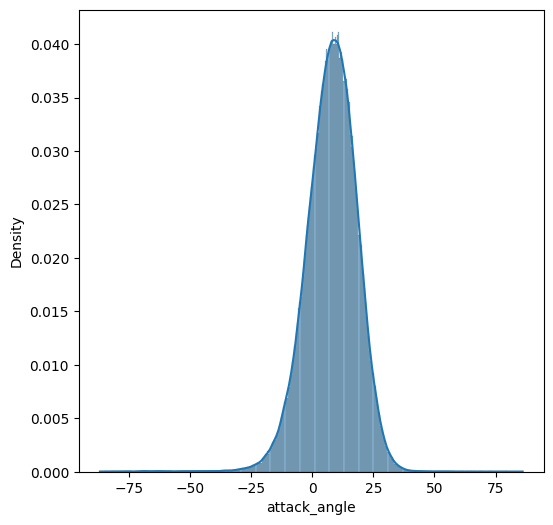

In [62]:
not_null_aa = batter_data[(batter_data['attack_angle'].notna()) & (batter_data['launch_angle'].notna())].copy()
not_null_aa.loc[:, 'angle_discrepancy'] = (not_null_aa['attack_angle'] - not_null_aa['launch_angle']).abs()
not_null_aa["hit_distance_sc"] = batter_data[batter_data['hit_distance_sc'].notna()]['hit_distance_sc']
plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='attack_angle', stat='density', kde=True)
plt.show()

In [63]:
not_null_aa["hit_distance_sc"]

0           5.0
7           3.0
8         262.0
10         24.0
11        217.0
          ...  
708814    124.0
708817     21.0
708819    308.0
708821    326.0
708824     31.0
Name: hit_distance_sc, Length: 221425, dtype: float64

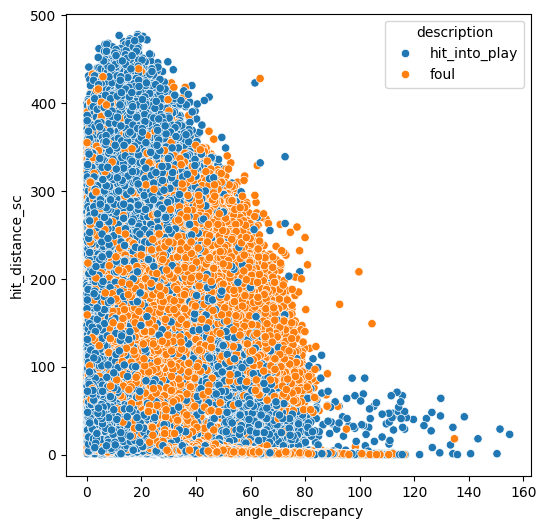

In [64]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='description')
plt.show()

In [72]:
not_null_aa.groupby("batter_name")[["angle_discrepancy","hit_distance_sc"]].apply(lambda x: x)

angle_discrepancy  hit_distance_sc
batter_name                                           
Aaron Hicks 346600          12.648085            158.0
            346696          45.061737              5.0
            346747          36.628888              4.0
            346843          76.450752              2.0
            346844          59.891587              2.0
...                               ...              ...
Zack Short  582239          39.939127              9.0
            582240          23.853834            234.0
            582241          43.596470            220.0
            582243          57.706327            187.0
            582244          72.222924              1.0

[221425 rows x 2 columns]

In [10]:
qualified_num = 162 * 6
shadow_zone_pitches = savant_2024[savant_2024['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
catcher_counts = shadow_zone_pitches.groupby('catcher_name').size()
qualified_catchers = catcher_counts[catcher_counts >= qualified_num].index.tolist()
shadow_zone_pitches = shadow_zone_pitches[shadow_zone_pitches['catcher_name'].isin(qualified_catchers)].copy()

KeyError: 'catcher_name'

In [ ]:
useful_catcher_cols = ['catcher_name', 'player_name', 'events', 
                       'description', 'balls', 'strikes', 'zone',
                       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 
                       'woba_value', 'woba_denom','delta_pitcher_run_exp', 
                       'delta_home_win_exp']


catcher_data = shadow_zone_pitches[useful_catcher_cols].reset_index(drop=True).copy()
non_swings = ['ball', 'called_strike']
catcher_data = catcher_data[catcher_data['description'].isin(non_swings)].copy()

In [ ]:
catcher_data.loc[:, 'is_called_strike'] = (catcher_data['description']=='called_strike').astype(int).copy()

In [ ]:
catcher_data

,catcher_name,player_name,events,description,balls,strikes,zone,plate_x,plate_z,sz_top,sz_bot,woba_value,woba_denom,delta_pitcher_run_exp,delta_home_win_exp,is_called_strike
0,Francisco Alvarez,"Díaz, Edwin",NaN,ball,1,2,14.0,0.75,1.20,3.47,1.52,NaN,NaN,-0.037,0.0,0
1,Francisco Alvarez,"Díaz, Edwin",NaN,ball,0,1,14.0,0.61,1.18,3.47,1.54,NaN,NaN,-0.012,0.0,0
7,Francisco Alvarez,"Díaz, Edwin",NaN,ball,2,2,11.0,-0.40,3.60,3.45,1.59,NaN,NaN,-0.108,0.0,0
8,Francisco Alvarez,"Díaz, Edwin",NaN,ball,1,2,14.0,0.70,1.26,3.61,1.70,NaN,NaN,-0.043,0.0,0
11,Travis d'Arnaud,"Johnson, Pierce",NaN,ball,2,2,11.0,-1.33,2.84,3.13,1.46,NaN,NaN,-0.106,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350758,Logan O'Hoppe,"Fulmer, Carson",NaN,ball,0,1,13.0,-0.22,1.00,3.51,1.53,NaN,NaN,-0.025,0.0,0
350761,Jacob Stallings,"Feltner, Ryan",NaN,ball,1,1,14.0,1.84,0.63,3.44,1.51,NaN,NaN,-0.058,0.0,0
350762,Jacob Stallings,"Feltner, Ryan",NaN,ball,0,0,11.0,-0.86,3.86,3.30,1.49,NaN,NaN,-0.040,0.0,0
350764,Jacob Stallings,"Feltner, Ryan",NaN,ball,1,2,14.0,1.58,0.66,3.48,1.51,NaN,NaN,-0.043,0.0,0


In [ ]:
catcher_data['description'].unique()

array(['ball', 'called_strike'], dtype=object)

In [ ]:
catcher_data['events'].unique()

array([nan, 'walk', 'strikeout', 'truncated_pa', 'catcher_interf'],
      dtype=object)

In [ ]:
no_pitches = catcher_data.groupby('catcher_name')['zone'].size().copy()

In [ ]:
strike_zone_pct = catcher_data.groupby(['catcher_name', 'zone'])['is_called_strike'].mean().copy()
strike_zone_pct = strike_zone_pct.reset_index().copy()
strike_zone_pct = strike_zone_pct.merge(no_pitches, how='left', on='catcher_name').rename(columns={'zone_x': 'zone', 'zone_y': 'no_pitches'}).copy()

In [ ]:
strike_zone_pct.rename({'zone_x': 'zone', 'zone_y': 'no_pitches'})

,catcher_name,zone,is_called_strike,no_pitches
0,Adley Rutschman,11.0,0.071483,4941
1,Adley Rutschman,12.0,0.067265,4941
2,Adley Rutschman,13.0,0.057511,4941
3,Adley Rutschman,14.0,0.046526,4941
4,Adrian Del Castillo,11.0,0.084906,913
...,...,...,...,...
291,Yan Gomes,14.0,0.024064,1340
292,Yasmani Grandal,11.0,0.031378,3136
293,Yasmani Grandal,12.0,0.112795,3136
294,Yasmani Grandal,13.0,0.081667,3136


In [ ]:
strike_zone_pct[strike_zone_pct['zone']==11.0].sort_values(by='is_called_strike', ascending=False)

,catcher_name,zone,is_called_strike,no_pitches
84,Elias Diaz,11.0,0.099237,3515
4,Adrian Del Castillo,11.0,0.084906,913
44,Cal Raleigh,11.0,0.076976,5701
212,Patrick Bailey,11.0,0.072616,5229
0,Adley Rutschman,11.0,0.071483,4941
...,...,...,...,...
140,Joey Bart,11.0,0.027624,3060
80,Dillon Dingler,11.0,0.025723,1105
176,Luis Campusano,11.0,0.021651,3503
208,Omar Narvaez,11.0,0.021605,1153


In [ ]:
strike_zone_pct[strike_zone_pct['zone']==12.0].sort_values(by='is_called_strike', ascending=False)

,catcher_name,zone,is_called_strike,no_pitches
117,Hunter Goodman,12.0,0.126697,918
249,Tomas Nido,12.0,0.122727,1944
9,Alejandro Kirk,12.0,0.122124,4275
81,Dillon Dingler,12.0,0.117647,1105
269,Victor Caratini,12.0,0.116883,2655
...,...,...,...,...
229,Riley Adams,12.0,0.054131,1751
257,Tucker Barnhart,12.0,0.051724,1319
5,Adrian Del Castillo,12.0,0.050847,913
273,Will Smith,12.0,0.050052,5616


In [ ]:
strike_zone_pct[strike_zone_pct['zone']==13.0].sort_values(by='is_called_strike', ascending=False)

,catcher_name,zone,is_called_strike,no_pitches
78,David Fry,13.0,0.126437,752
102,Gabriel Moreno,13.0,0.096774,3890
26,Austin Hedges,13.0,0.094778,2290
10,Alejandro Kirk,13.0,0.093396,4275
122,Ivan Herrera,13.0,0.089354,2439
...,...,...,...,...
14,Alex Jackson,13.0,0.036923,2231
118,Hunter Goodman,13.0,0.032787,918
226,Rene Pinto,13.0,0.029703,662
202,Mitch Garver,13.0,0.026178,1020


In [ ]:
strike_zone_pct[strike_zone_pct['zone']==14.0].sort_values(by='is_called_strike', ascending=False)

,catcher_name,zone,is_called_strike,no_pitches
95,Francisco Alvarez,14.0,0.094074,4266
91,Eric Haase,14.0,0.091483,959
295,Yasmani Grandal,14.0,0.090984,3136
251,Tomas Nido,14.0,0.086721,1944
215,Patrick Bailey,14.0,0.082005,5229
...,...,...,...,...
43,Brian Serven,14.0,0.036111,1017
235,Ryan Jeffers,14.0,0.034107,3704
203,Mitch Garver,14.0,0.031579,1020
7,Adrian Del Castillo,14.0,0.028409,913


In [ ]:
delta_run_exp_col = savant_2024.columns.get_loc('delta_run_exp')
new_statcast = savant_2024.iloc[:, delta_run_exp_col+1:].copy()
new_statcast

,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,catcher_name,pitch_uid
0,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,Francisco Alvarez,747139_82_5
1,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,Francisco Alvarez,747139_82_4
2,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,Francisco Alvarez,747139_82_3
3,NaN,NaN,NaN,-0.012,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.09,-0.21,-0.21,22.4,Francisco Alvarez,747139_82_2
4,71.7,9.0,NaN,0.040,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.20,-0.17,-0.17,20.2,Francisco Alvarez,747139_82_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708820,NaN,NaN,NaN,0.041,NaN,0,0,0.537,0.463,30,26,31,26,1,0,6.0,1.0,6.0,1.0,1.16,0.63,0.63,36.7,Logan O'Hoppe,746196_3_1
708821,78.5,7.4,0.064,0.243,88.0,0,0,0.522,0.478,30,22,31,23,1,0,6.0,1.0,6.0,1.0,2.00,1.53,1.53,39.9,Logan O'Hoppe,746196_2_3
708822,NaN,NaN,NaN,-0.024,NaN,0,0,0.522,0.478,30,22,31,23,1,0,6.0,1.0,6.0,1.0,3.10,-0.37,-0.37,37.0,Logan O'Hoppe,746196_2_2
708823,NaN,NaN,NaN,0.037,NaN,0,0,0.522,0.478,30,22,31,23,1,0,6.0,1.0,6.0,1.0,2.02,1.30,1.30,34.7,Logan O'Hoppe,746196_2_1
